# <font color='red'> Project 1

# Project description:
- Please read the Data Set Information section to learn about this dataset. 
- Data description is also provided for thi dataset.
- Read data into Jupyter notebook, use pandas to import data into a data frame
- Preprocess data: Explore data, check for missing data and apply data scaling. Justify the type of scaling used.

# [1] Data Set Information

This Dataset has been taken from kaggle.com
The source of the data set is given as follows: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

### File Description

### Data fields: Attribute Information

# [2] Importing Basic Libraries

In [1]:
#loading Packages
import numpy as np
import matplotlib as mlt
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from  sklearn.preprocessing  import PolynomialFeatures
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import classification_report,confusion_matrix

# [3] Reading the datasets

In [2]:
data = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

print('Shape of train data: ', data.shape)
print('Shape of test data: ', test.shape)

Shape of train data:  (1460, 81)
Shape of test data:  (1459, 80)


# [4] Initial Overview of the datasets

In [3]:
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [4]:
#taking the statistic summary
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# [5] Pre-processing the datasets and cleaning them 

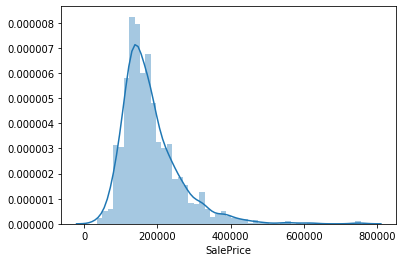

In [6]:
#plotting the histogram
sns.distplot(data['SalePrice']);

We observe the following: 1. Non-Normality, 2.Left skewed 

# [6] Handling missing data

In [7]:
null_columns=data.columns[data.isnull().any()]
data[null_columns].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

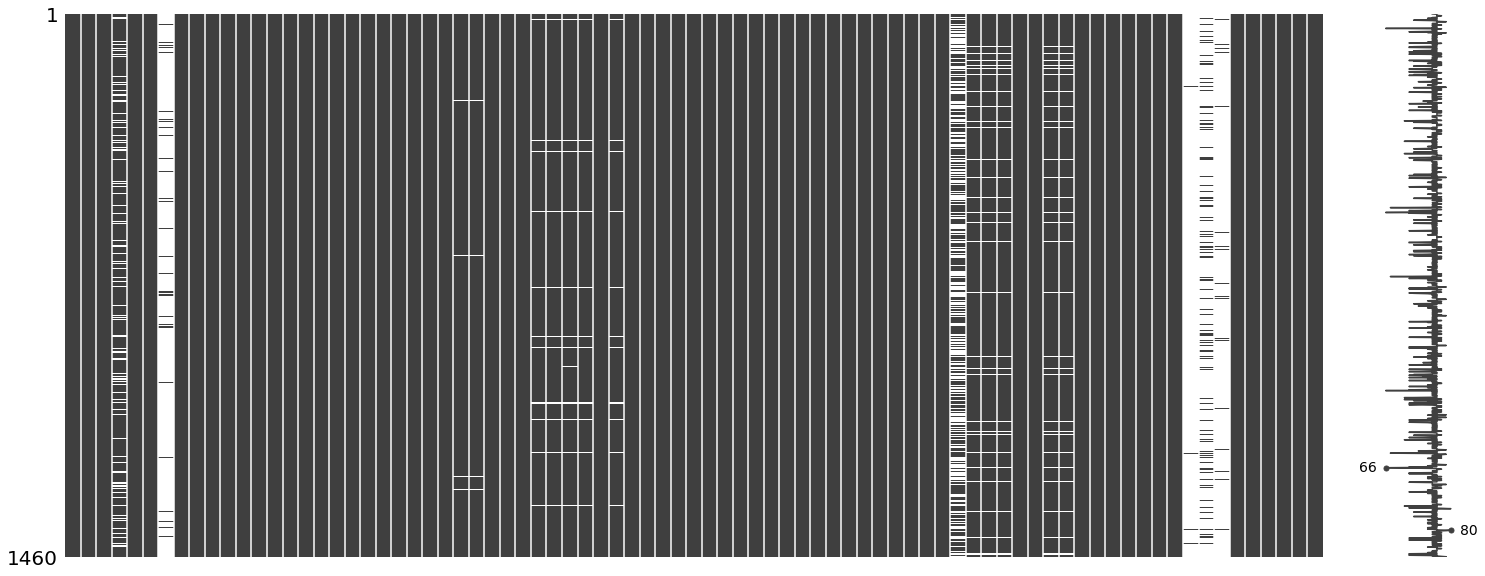

In [8]:
import missingno as msno
msno.matrix(data)

# [7] Imputing missing data

In [79]:
#filling NA's of continuous variables with the mean of the column:
data['LotFrontage'].fillna((data['LotFrontage'].mean()), inplace=True)
data['MasVnrArea'].fillna((data['MasVnrArea'].mean()), inplace=True)
data['GarageYrBlt'].fillna((data['GarageYrBlt'].mean()), inplace=True)

In [80]:
null_columns=data.columns[data.isnull().any()]
data[null_columns].isnull().sum()

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [81]:
data = data.drop(columns=['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],axis=1)
data =data.dropna()
data.shape

(1338, 76)

In [82]:
cat = []

for i in data.columns:
    if data[i].dtype == 'O':
        cat.append(i)

In [83]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in cat:
    print("Encoding",i)
    data[i] = le.fit_transform(data[i])

Encoding MSZoning
Encoding Street
Encoding LotShape
Encoding LandContour
Encoding Utilities
Encoding LotConfig
Encoding LandSlope
Encoding Neighborhood
Encoding Condition1
Encoding Condition2
Encoding BldgType
Encoding HouseStyle
Encoding RoofStyle
Encoding RoofMatl
Encoding Exterior1st
Encoding Exterior2nd
Encoding MasVnrType
Encoding ExterQual
Encoding ExterCond
Encoding Foundation
Encoding BsmtQual
Encoding BsmtCond
Encoding BsmtExposure
Encoding BsmtFinType1
Encoding BsmtFinType2
Encoding Heating
Encoding HeatingQC
Encoding CentralAir
Encoding Electrical
Encoding KitchenQual
Encoding Functional
Encoding GarageType
Encoding GarageFinish
Encoding GarageQual
Encoding GarageCond
Encoding PavedDrive
Encoding SaleType
Encoding SaleCondition


In [84]:
data.shape

(1338, 76)

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1459
Data columns (total 76 columns):
Id               1338 non-null int64
MSSubClass       1338 non-null int64
MSZoning         1338 non-null int32
LotFrontage      1338 non-null float64
LotArea          1338 non-null int64
Street           1338 non-null int32
LotShape         1338 non-null int32
LandContour      1338 non-null int32
Utilities        1338 non-null int32
LotConfig        1338 non-null int32
LandSlope        1338 non-null int32
Neighborhood     1338 non-null int32
Condition1       1338 non-null int32
Condition2       1338 non-null int32
BldgType         1338 non-null int32
HouseStyle       1338 non-null int32
OverallQual      1338 non-null int64
OverallCond      1338 non-null int64
YearBuilt        1338 non-null int64
YearRemodAdd     1338 non-null int64
RoofStyle        1338 non-null int32
RoofMatl         1338 non-null int32
Exterior1st      1338 non-null int32
Exterior2nd      1338 non-null int32
Mas

# [8] Making the train test split

In [86]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

## Splitting data

from sklearn.model_selection import train_test_split

X=data.drop(columns=['SalePrice'],axis=1)
y =data['SalePrice']

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(936, 75)
(936,)
(402, 75)
(402,)


# Regression Task:
- Apply all the regression models you've learned so far. If your model has a scaling parameter(s) use Grid Search to find the best scaling parameter. Use plots and graphs to help you get a better glimpse of the results. 
- Then use cross validation to find average training and testing score. 
- Your submission should have at least the following regression models: KNN regressor, linear regression, Ridge, Lasso, polynomial regression, SVM both simple and with kernels. 
- Finally find the best regressor for this dataset and train your model on the entire dataset using the best parameters and predict buzz for the test_set.

# [1] Linear Regression

In [87]:
lreg = LinearRegression()
lreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [88]:
test = test.drop(columns=['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],axis=1)

In [89]:
test=test.fillna(test.mean())

In [90]:
test = test.dropna()
test.shape

(1319, 75)

In [91]:
for i in cat:
    print("Encoding",i)
    test[i] = le.fit_transform(test[i])

Encoding MSZoning
Encoding Street
Encoding LotShape
Encoding LandContour
Encoding Utilities
Encoding LotConfig
Encoding LandSlope
Encoding Neighborhood
Encoding Condition1
Encoding Condition2
Encoding BldgType
Encoding HouseStyle
Encoding RoofStyle
Encoding RoofMatl
Encoding Exterior1st
Encoding Exterior2nd
Encoding MasVnrType
Encoding ExterQual
Encoding ExterCond
Encoding Foundation
Encoding BsmtQual
Encoding BsmtCond
Encoding BsmtExposure
Encoding BsmtFinType1
Encoding BsmtFinType2
Encoding Heating
Encoding HeatingQC
Encoding CentralAir
Encoding Electrical
Encoding KitchenQual
Encoding Functional
Encoding GarageType
Encoding GarageFinish
Encoding GarageQual
Encoding GarageCond
Encoding PavedDrive
Encoding SaleType
Encoding SaleCondition


In [92]:
test_pred = lreg.predict(test)
test['SalePrice']=test_pred
test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,2,80.0,11622,1,3,3,0,4,...,0,0,120,0,0,6,2010,8,4,3.033840e+20
1,1462,20,3,81.0,14267,1,0,3,0,0,...,0,0,0,0,12500,6,2010,8,4,4.530868e+20
2,1463,60,3,74.0,13830,1,0,3,0,4,...,0,0,0,0,0,3,2010,8,4,7.071262e+20
3,1464,60,3,78.0,9978,1,0,3,0,4,...,0,0,0,0,0,6,2010,8,4,6.942451e+20
4,1465,120,3,43.0,5005,1,0,1,0,4,...,0,0,144,0,0,1,2010,8,4,4.385091e+20


In [93]:
from sklearn.metrics import mean_squared_error
pred_linear = lreg.predict(X_test)

print('Train score: {:.4f} %'.format(lreg.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(lreg.score(X_test, y_test)*100))

print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,pred_linear))))
print ("r2_score : ", lreg.score(X_test,y_test))


Train score: 90.3704 %
Test score: 52.3518 %
RMSE: 53544.8847
r2_score :  0.5235182719983205


Linear Regression Model is overfitting the data and r2_square shows that 52% of the data can be explained by the features.

### Cross Validation - Linear Regression

In [94]:
from sklearn.model_selection import cross_val_score, cross_val_predict
lin_reg = LinearRegression()
scores_train = cross_val_score(lin_reg, X_train, y_train)
scores_test = cross_val_predict(lin_reg, X_test, y_test)
print("Cross-validation scores_train: {}".format(scores_train))
print("Cross-validation scores_test: {}".format(scores_test))

Cross-validation scores_train: [-2.90024079e+23  8.49634914e-01  8.47169927e-01]
Cross-validation scores_test: [1.92792000e+05 1.03192000e+05 1.39672000e+05 1.38392000e+05
 1.81024000e+05 1.87160000e+05 2.27480000e+05 2.06744000e+05
 1.28664000e+05 1.78968000e+05 2.01752000e+05 1.12728000e+05
 4.04080000e+04 1.76408000e+05 2.08544000e+05 1.39032000e+05
 2.02264000e+05 2.92256000e+05 1.68280000e+05 1.33184000e+05
 1.86072000e+05 2.56024000e+05 1.35064000e+05 2.03168000e+05
 1.89976000e+05 4.67616000e+05 2.51160000e+05 1.39320000e+05
 1.96216000e+05 2.88920000e+05 2.05336000e+05 2.75736000e+05
 1.66232000e+05 2.15576000e+05 2.10200000e+05 2.19672000e+05
 1.17976000e+05 2.96216000e+05 1.19296000e+05 1.79192000e+05
 2.32984000e+05 3.12216000e+05 1.65272000e+05 4.54048000e+05
 1.56696000e+05 1.18168000e+05 2.51416000e+05 2.58968000e+05
 1.45816000e+05 1.06840000e+05 2.24664000e+05 2.90648000e+05
 2.90584000e+05 2.53848000e+05 2.10000000e+05 2.08920000e+05
 1.73576000e+05 1.80568000e+05 8.62

c:\users\vithi\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\vithi\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [95]:
print("Average cross-validation score_train: {:.2f}".format(scores_train.mean()))
print("Average cross-validation score_test: {:.2f}".format(scores_test.mean()))

Average cross-validation score_train: -96674693087991705894912.00
Average cross-validation score_test: 111380291.61


# [2] Ridge

In [96]:
from  sklearn.linear_model import Ridge

x_range = [0.01, 0.1, 1, 10, 100, 1000]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    train_score_list.append(ridge.score(X_train,y_train))
    test_score_list.append(ridge.score(X_test, y_test))

Text(0.5, 0, '$\\alpha$')

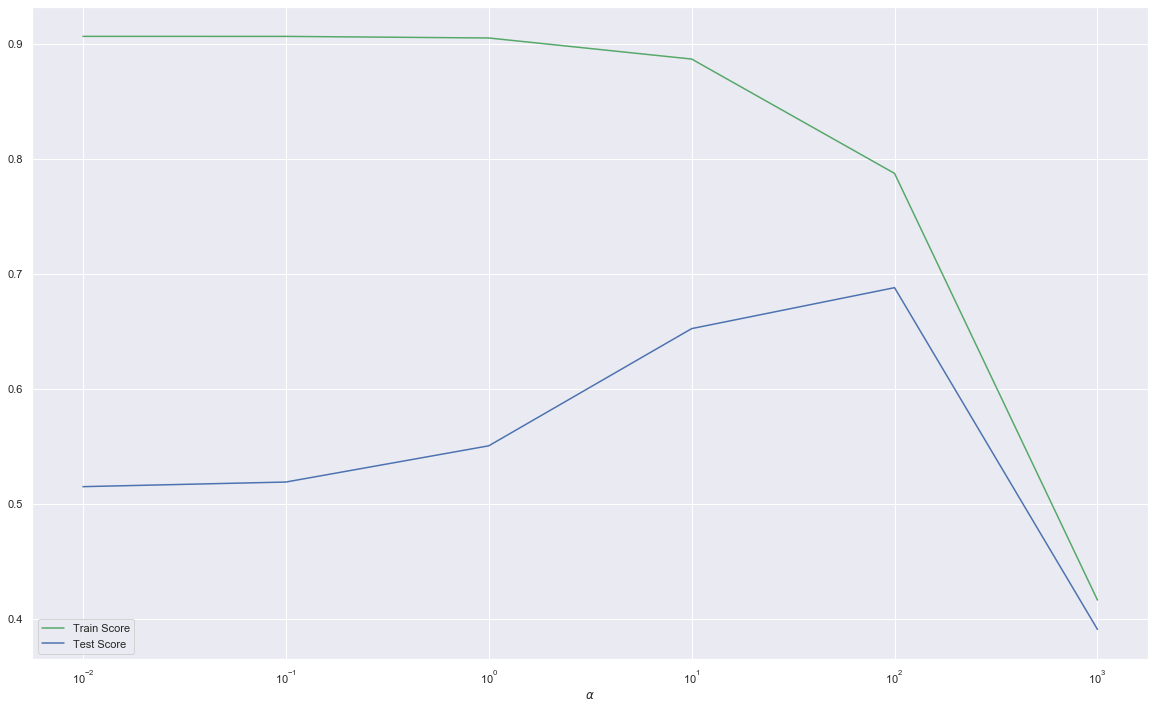

In [97]:
%matplotlib inline
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(20,12)})

plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

Here the optimum value of alpha is 100

In [98]:
ridge = Ridge(alpha = 100)
ridge.fit(X_train,y_train)

y_pred_ridge=ridge.predict(X_test)

print('Train score: {:.4f} %'.format(ridge.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(ridge.score(X_test, y_test)*100))

print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred_ridge))))
print ("r2_score : ", ridge.score(X_test,y_test))


Train score: 78.7193 %
Test score: 68.7798 %
RMSE: 43342.3995
r2_score :  0.6877976428812039


Ridge is fitting the data near to sweet spot and is slightly overfitting. R2_score denotes that 68% of the data is being explained by the features

In [99]:
ridge.intercept_

142452.4371995161

### Feature Importance from Ridge

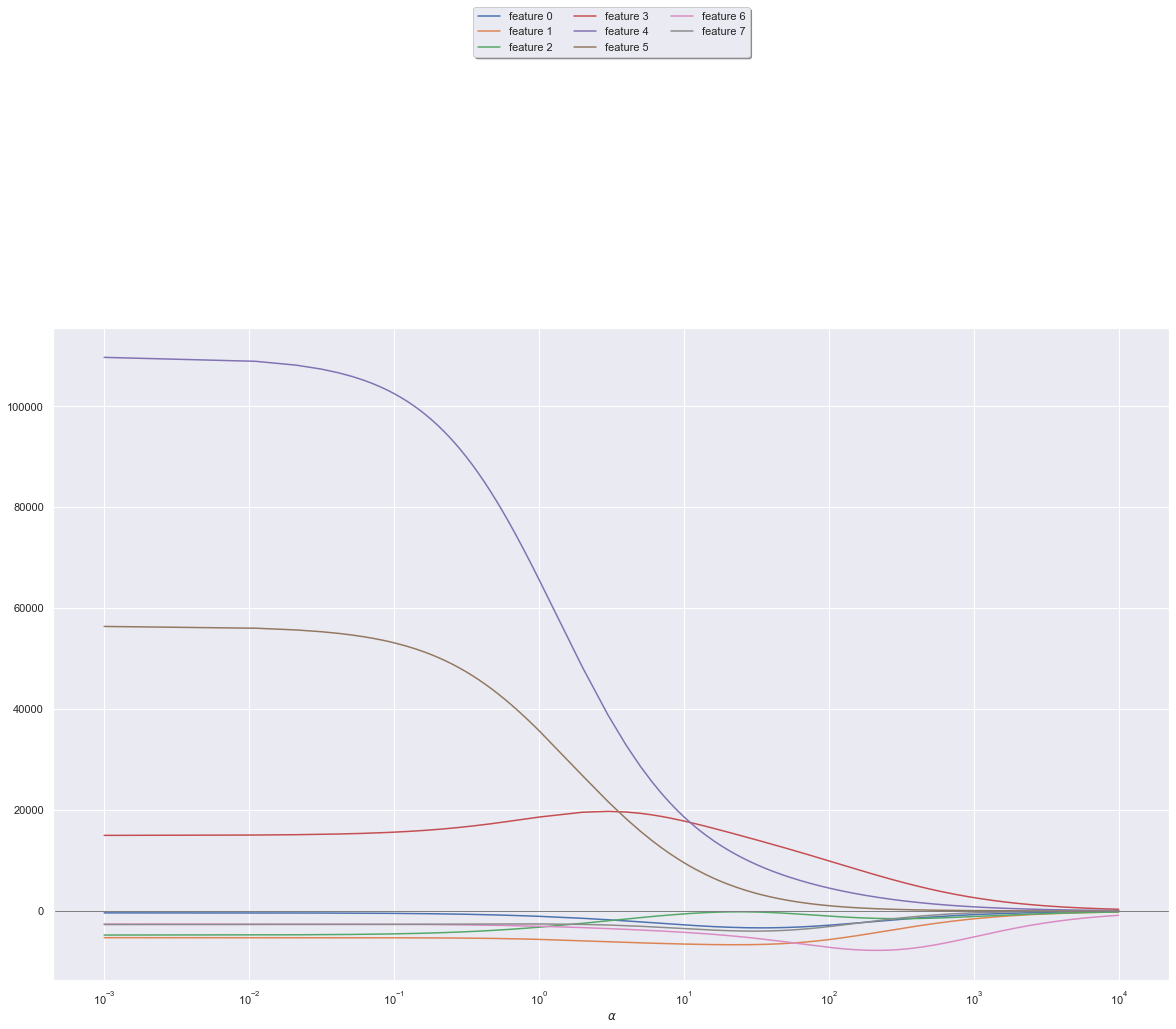

In [100]:
%matplotlib inline
sns.set(rc={'figure.figsize':(20,12)})

x_range1 = np.linspace(0.001, 1, 100).reshape(-1,1)
x_range2 = np.linspace(1, 10000, 10000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

for i in range(0,8):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

Here feature 3 is the most important one and feature 2 is the least important

### Cross Validation - Ridge

In [101]:
from sklearn.model_selection import cross_val_score, cross_val_predict
ridge1 = Ridge(alpha = 100)
scores_train = cross_val_score(ridge1, X_train, y_train)
scores_test = cross_val_score(ridge1, X_test, y_test)
print("Cross-validation scores_train: {}".format(scores_train))
print("Cross-validation scores_test: {}".format(scores_test))


Cross-validation scores_train: [0.7868562  0.68239519 0.76019187]
Cross-validation scores_test: [0.65359757 0.56127707 0.46583194]


c:\users\vithi\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\vithi\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [102]:
print("Average cross-validation score_train: {:.2f}".format(scores_train.mean()))
print("Average cross-validation score_test: {:.2f}".format(scores_test.mean()))

Average cross-validation score_train: 0.74
Average cross-validation score_test: 0.56


# [3] Lasso

In [104]:
from sklearn.linear_model import Lasso
x_range = [1, 10, 100,1000, 10000]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))

Text(0.5, 0, '$\\alpha$')

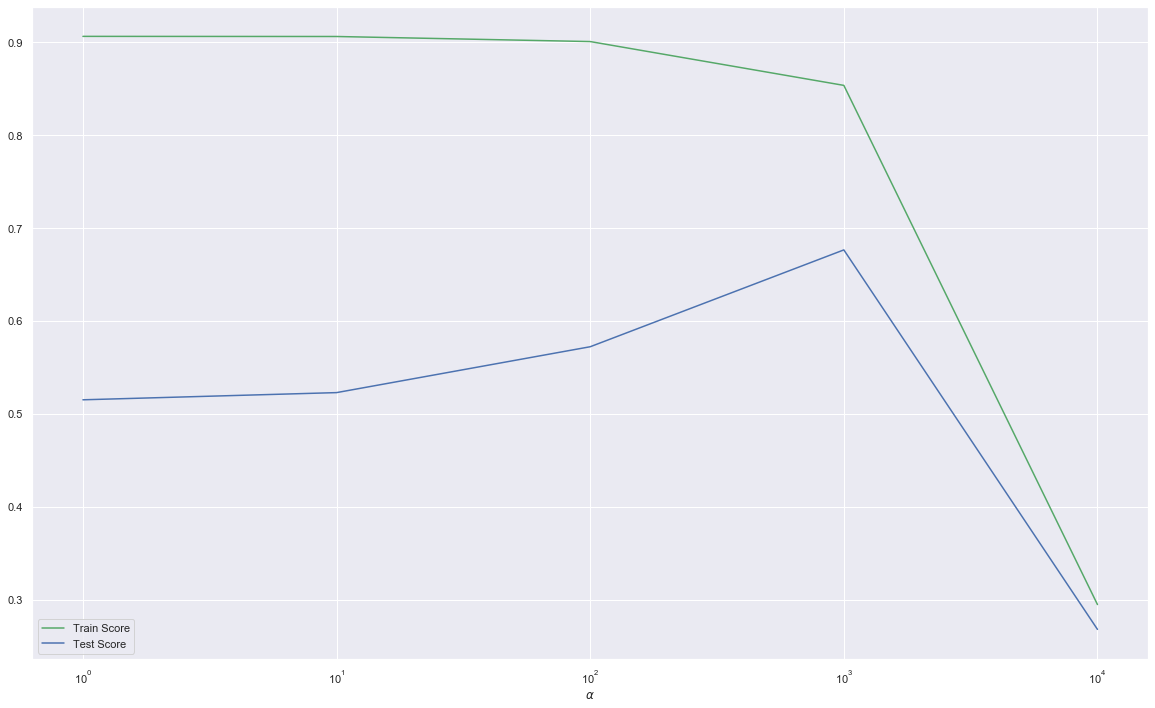

In [105]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

The optimum value of alpha is 1000

In [106]:
lasso = Lasso(alpha = 1000)
lasso.fit(X_train,y_train)

y_pred_lasso=lasso.predict(X_test)

print('Train score: {:.4f} %'.format(lasso.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(lasso.score(X_test, y_test)*100))
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred_lasso))))
print('r2_score :', lasso.score(X_test,y_test))

Train score: 85.3640 %
Test score: 67.6489 %
RMSE: 44120.4260
r2_score : 0.6764885389055111


The Lasso model overfits the data given the difference in train and test score. Also, the r2_score shows that 67% of the data is being explained by its features

### Feature Importance based on LASSO

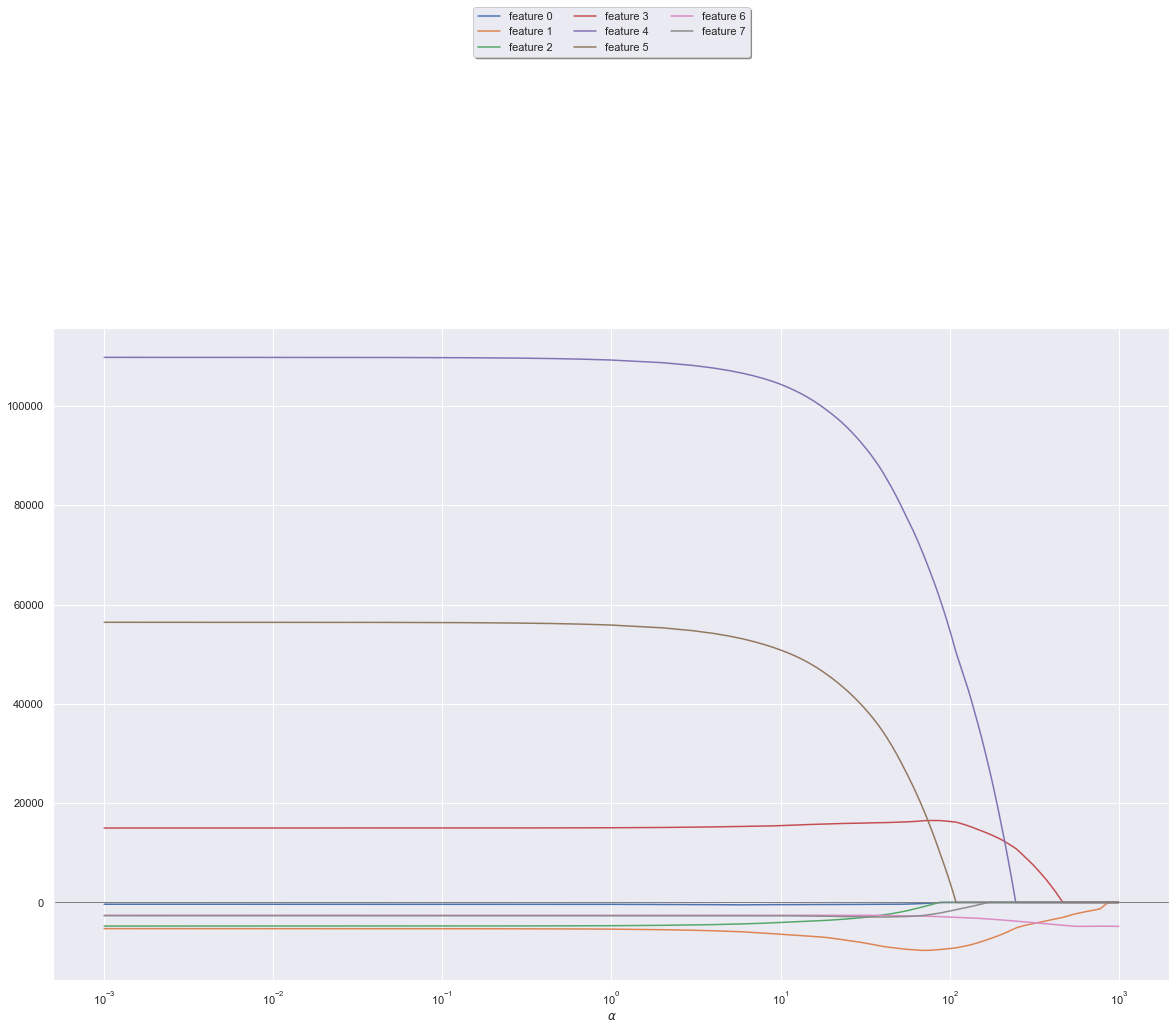

In [107]:
%matplotlib inline
sns.set(rc={'figure.figsize':(20,12)})


x_range1 = np.linspace(0.001, 1, 1000).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 1000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

for i in range(0,8):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

The best feature is feature1 and the least important feature is feature 5

### Cross Validation - Lasso

In [108]:
from sklearn.model_selection import cross_val_score, cross_val_predict
lasso1 = Lasso(alpha = 1000)
scores_train = cross_val_score(lasso1, X_train, y_train)
scores_test = cross_val_predict(lasso1, X_train, y_train)

print("Cross-validation scores_train: {}".format(scores_train))
print("Cross-validation scores_test: {}".format(scores_test))

Cross-validation scores_train: [0.87714809 0.79441935 0.86921188]
Cross-validation scores_test: [170468.9323445   91524.58002077 296845.58144524 165662.63018434
 286637.71086401 134138.80633138 192753.67520919 142203.85300074
 142437.43929725 166478.91657135 203331.22372153 276116.436211
 110066.87589298 125903.12800883 249985.01411723 217285.20805203
 193972.36081114 201253.64435689 102478.01936622 119146.71127724
 108486.42122622 289562.42016156 167233.66931536 224755.09733562
 143013.62172963 135890.96966132 202345.62511409 131502.62527166
 189109.87745169 199183.26355439 109550.54915405 201663.40433472
 160592.03299269 216022.99630042 130444.06704564 164206.46398299
 146567.0915285  182004.56975648 252622.97194971 186538.02032744
 354555.75146995  87254.22822729 223272.13066461 226369.66712019
 271467.12813127 158416.50069774 119163.66365631 157196.9593104
 152482.32943238 385591.67529348 195740.99794932 298336.43342783
 242365.09524106 174068.44334512 128072.26106661 387182.553020

c:\users\vithi\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\vithi\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [109]:
print("Average cross-validation score: {:.2f}".format(scores_train.mean()))
print("Average cross-validation score: {:.2f}".format(scores_test.mean()))

Average cross-validation score: 0.85
Average cross-validation score: 187921.93


# [4] Polynomial Regression

In [110]:
from sklearn.preprocessing import PolynomialFeatures
train_score_list = []
test_score_list = []

for n in range(1,3):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    lreg.fit(X_train_poly, y_train)
    train_score_list.append(lreg.score(X_train_poly, y_train))
    test_score_list.append(lreg.score(X_test_poly, y_test))

In [111]:
print(train_score_list)
print(test_score_list)

[0.9064150910837175, 1.0]
[0.51425042788032, -0.8574880401702851]


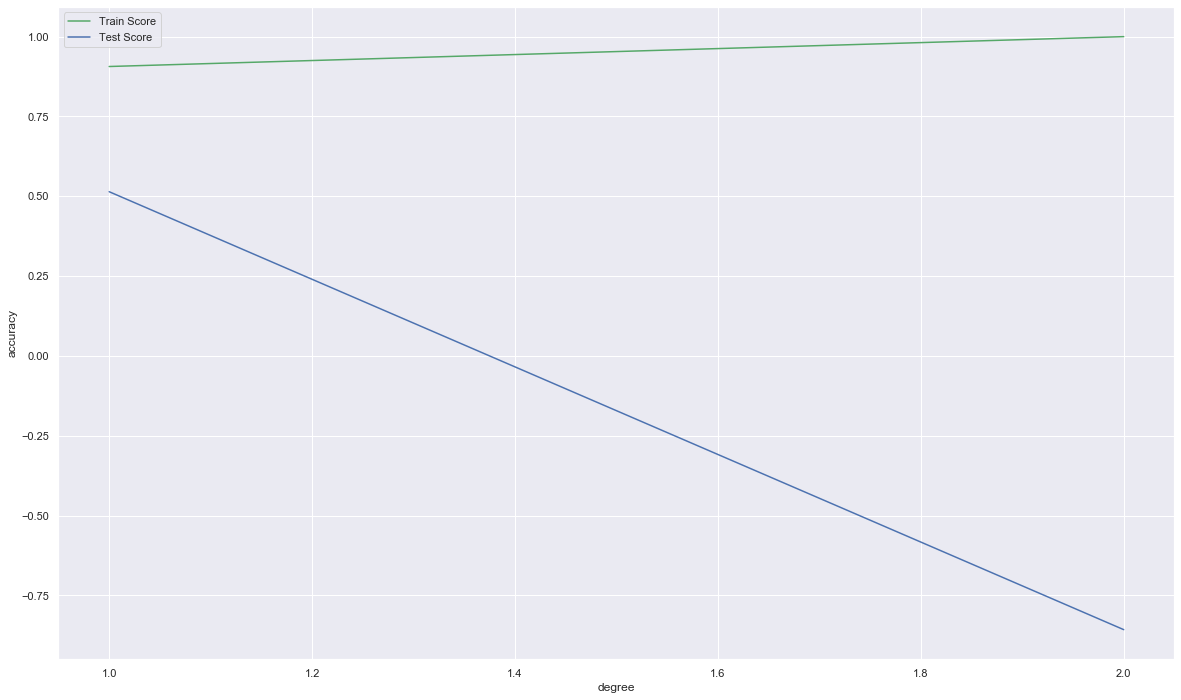

In [112]:
%matplotlib inline
sns.set(rc={'figure.figsize':(20,12)})


x_axis = range(1,3)
plt.plot(x_axis, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_list, c = 'b', label = 'Test Score')
plt.xlabel('degree')
plt.ylabel('accuracy')
plt.legend()

Here we can see that the degree = 1. Hence, we need to take linear only

In [117]:
poly = PolynomialFeatures(1)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
lreg.fit(X_train_poly, y_train)

y_pred_poly=lreg.predict(X_test_poly)

print('Train score: {:.4f} %'.format(lreg.score(X_train_poly, y_train)*100))
print('Test score: {:.4f} %'.format(lreg.score(X_test_poly, y_test)*100))

print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred_poly))))
print('r2_score :', lreg.score(X_test_poly,y_test))

Train score: 90.6415 %
Test score: 51.4250 %
RMSE: 54063.1162
r2_score : 0.51425042788032


The train and test score shows that the model clearly overfits the data and the r2_score denotes that 51% of the data is being explained by the features

# [5] Decision Tree Regressor

Text(0, 0.5, 'Scores')

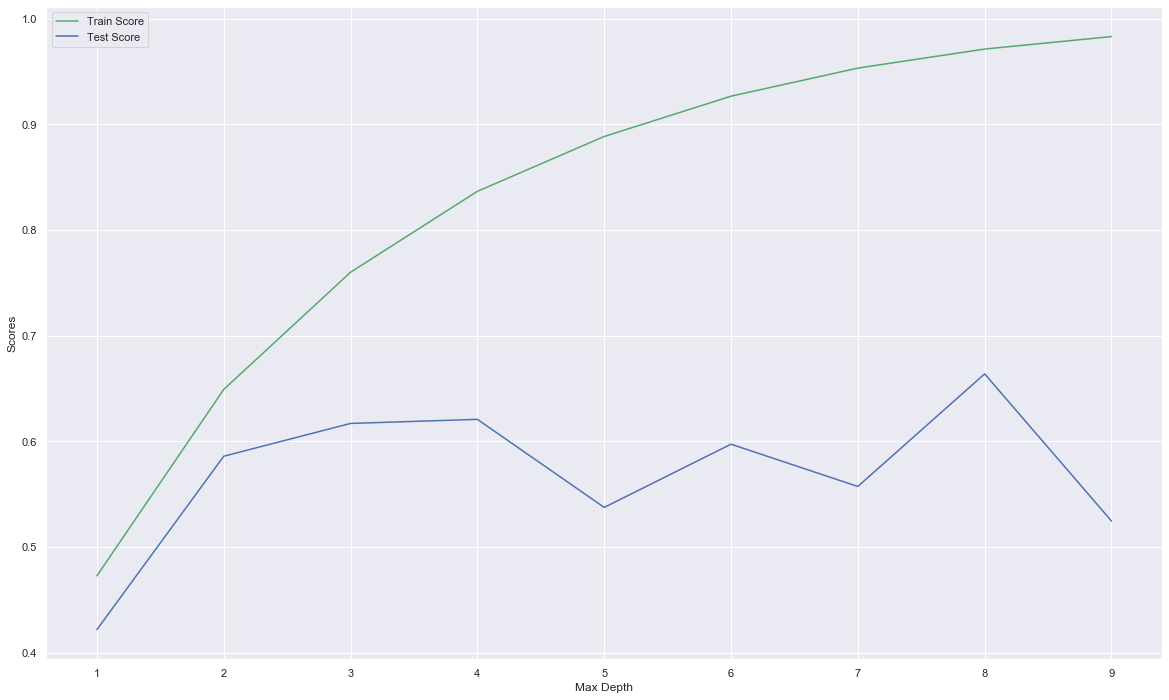

In [118]:
from sklearn.tree import DecisionTreeRegressor

sns.set(rc={'figure.figsize':(20,12)})


train_score_array = []
test_score_array = []

for n in range(1,10):
    tree = DecisionTreeRegressor(max_depth=n)
    tree.fit(X_train, y_train)
    train_score_array.append(tree.score(X_train, y_train))
    test_score_array.append(tree.score(X_test, y_test))

x_axis = range(1,10)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel('Scores')

In [119]:
tree = DecisionTreeRegressor(max_depth=4)
tree.fit(X_train, y_train)

y_pred=tree.predict(X_test)

print('Train score: {:.4f} %'.format(tree.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(tree.score(X_test, y_test)*100))

print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))
print('r2_score :', tree.score(X_test,y_test))

Train score: 83.6598 %
Test score: 60.0796 %
RMSE: 49010.8674
r2_score : 0.6007958438737377


Hence, this shows that this model slightly overfits the data and the r2_score denotes 68% of data is being explained by its features

### Grid Search - Decision Tree Regressor

In [120]:
from pprint import pprint
pprint(tree.get_params())

{'criterion': 'mse',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}


In [121]:
from sklearn.model_selection import GridSearchCV
param_grid_tree = {
            'max_depth' : range(1,10),
            'min_samples_leaf' : range(1,10)
            }

CV_tree = GridSearchCV(estimator =tree, param_grid = param_grid_tree , return_train_score=True, verbose = 1, n_jobs = -1)
CV_tree.fit(X_train, y_train)

best_parameters_tree=CV_tree.best_params_
print(best_parameters_tree)

c:\users\vithi\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s


{'max_depth': 7, 'min_samples_leaf': 3}


[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed:    2.8s finished


### Using best parameters obtained from GridSearch for Decision Tree Regressor

In [122]:
tree = DecisionTreeRegressor(max_depth=7,min_samples_leaf=3)
tree.fit(X_train, y_train)

y_pred_tree=tree.predict(X_test)

print('Train score: {:.4f} %'.format(tree.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(tree.score(X_test, y_test)*100))
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred_tree))))
print('r2_score :', tree.score(X_test,y_test))

Train score: 93.4643 %
Test score: 66.4837 %
RMSE: 44907.8897
r2_score : 0.6648373849748306


Though with grid search, r2_score increases with max_depth = 7, however, the max_depth = 7, also increases overfitting in the data.

### Cross Validation - Decision Tree

In [123]:
from sklearn.model_selection import cross_val_score, cross_val_predict
tree1 = DecisionTreeRegressor(max_depth=4,min_samples_leaf=3)
scores_train = cross_val_score(tree1, X_train, y_train)
scores_test = cross_val_predict(tree1, X_test, y_test)
print("Cross-validation scores_train: {}".format(scores_train))
print("Cross-validation scores_test: {}".format(scores_test))

Cross-validation scores_train: [0.72891315 0.71561627 0.76464041]
Cross-validation scores_test: [239655.27777778 108125.88235294 135208.33333333 137478.26086957
 160787.52631579 160787.52631579 239655.27777778 239077.68421053
 108125.88235294 193060.46969697 160787.52631579 160787.52631579
 108125.88235294 137478.26086957 160787.52631579 108125.88235294
 137478.26086957 319217.07692308 135208.33333333 108125.88235294
 137478.26086957 133655.         160787.52631579 239655.27777778
 160787.52631579 319217.07692308 239655.27777778 160787.52631579
 160787.52631579 319217.07692308 193060.46969697 193060.46969697
 239077.68421053 239655.27777778 193060.46969697 193060.46969697
 135208.33333333 239655.27777778 137478.26086957 133655.
 193060.46969697 239077.68421053 108125.88235294 319217.07692308
 133655.         133655.         137478.26086957 193060.46969697
 160787.52631579 135208.33333333 239655.27777778 509792.
 137478.26086957 239077.68421053 445864.         108125.88235294
 137478.26

c:\users\vithi\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\vithi\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [124]:
print("Average cross-validation score_test: {:.2f}".format(scores_test.mean()))
print("Average cross-validation score_train: {:.2f}".format(scores_train.mean()))

Average cross-validation score_test: 184458.80
Average cross-validation score_train: 0.74


# [6] KNN Regressor

Text(0, 0.5, 'Score')

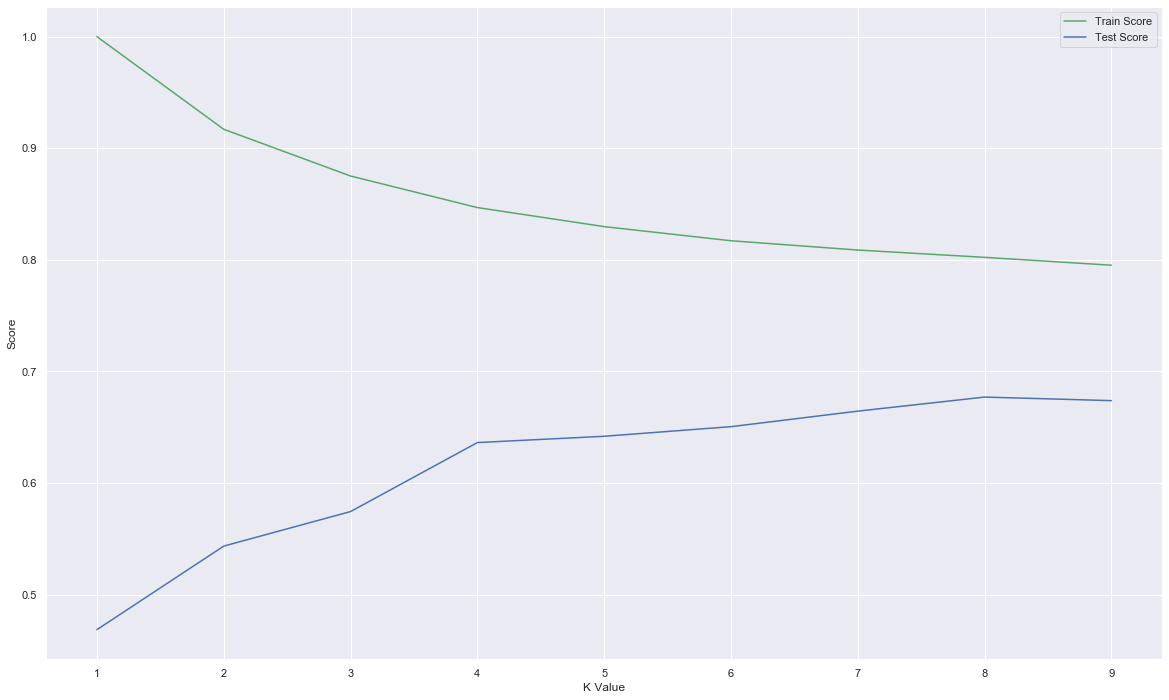

In [125]:
from sklearn.neighbors import KNeighborsRegressor

sns.set(rc={'figure.figsize':(20,12)})

train_score_array = []
test_score_array = []

for k in range(1,10):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train, y_train)
    train_score_array.append(knn_reg.score(X_train, y_train))
    test_score_array.append(knn_reg.score(X_test, y_test))

x_axis = range(1,10)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend() 
plt.xlabel('K Value')
plt.ylabel('Score')

Hence we take n = 8 here

In [160]:
knn_reg = KNeighborsRegressor(8)
knn_reg.fit(X_train, y_train)
y_pred = knn_reg.predict(X_test)
print('Train score: {:.4f} %'.format(knn_reg.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(knn_reg.score(X_test, y_test)*100))

print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))
print('r2_score :', knn_reg.score(X_test,y_test))

Train score: 80.2245 %
Test score: 67.7056 %
RMSE: 44081.7459
r2_score : 0.6770555322288389


Here the model slightly overfits the data. And the r2_score denotes that 67% of the data is being explained by features

### GridSearch - KNN

In [127]:
from pprint import pprint
pprint(knn_reg.get_params())

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 4,
 'p': 2,
 'weights': 'uniform'}


In [128]:
param_grid_knn = {
            'leaf_size' : range(1,50),
            'n_neighbors' : range(1,50),
            'p': [1,2],
            'weights': ['distance','uniform'],
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
            }

CV_knn = GridSearchCV(estimator =knn_reg, param_grid = param_grid_knn , return_train_score=True, verbose = 1, n_jobs = -1)
CV_knn.fit(X_train, y_train)

best_parameters_knn=CV_knn.best_params_
print(best_parameters_knn)

c:\users\vithi\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 38416 candidates, totalling 115248 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   26.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 11234 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 12784 tasks      | elapsed:  9

{'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 6, 'p': 1, 'weights': 'distance'}


### Using the best parameters for KNN Regressor obtained from GridSearch

In [129]:
knn_reg1=KNeighborsRegressor(n_neighbors=6,leaf_size=1,weights='distance',algorithm='auto',p=1)

knn_reg1.fit(X_train, y_train)

y_pred_knn=knn_reg1.predict(X_test)

print('Train score: {:.4f} %'.format(knn_reg1.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(knn_reg1.score(X_test, y_test)*100))
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred_knn))))
print('r2_score :', knn_reg1.score(X_test,y_test))

Train score: 100.0000 %
Test score: 71.9975 %
RMSE: 41048.0873
r2_score : 0.7199754374005909


Though with grid search, r2_score increases with n_neighbors = 6, however, the n_neighbors = 6, also increases overfitting in the data.

### Cross Validation - KNN Regressor

In [98]:
from sklearn.model_selection import cross_val_score, cross_val_predict
knn_reg=KNeighborsRegressor(n_neighbors=4,leaf_size=1,weights='distance',algorithm='auto',p=1)
scores_train = cross_val_score(knn_reg, X_train, y_train)
scores_test = cross_val_predict(knn_reg, X_test, y_test)
print("Cross-validation scores_train: {}".format(scores_train))
print("Cross-validation scores_test: {}".format(scores_test))

c:\users\vithi\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Cross-validation scores_train: [0.77963229 0.76420444 0.7722651 ]
Cross-validation scores_test: [209547.27263117 130228.32121508 122719.81863633 149373.4090352
 186126.0046466  195711.05025804 204610.86738377 236752.61386449
 128135.78051678 185200.62719749 161667.04019368 139606.43396208
  87443.71490888 140235.69321441 216577.20997815 136711.63813177
 164685.52290259 255614.9957668  152020.6990789  131310.0888373
 146184.12080242 137890.65933684 168512.30036688 215760.52233894
 181761.02981089 377826.94518691 211023.98780916 135353.88221928
 198390.38288817 273732.03380456 190249.73238825 167563.66335903
 201892.50627564 237864.47157256 191356.99498213 201991.50407049
 136055.60327489 232814.67501527 123302.54157754 123564.8294782
 194208.10425564 276274.67235644 111007.84690118 245319.15731163
 109329.1178649  122140.71928156 148765.21592599 194810.29322404
 128479.58028325 132776.66050707 228951.0332734  269241.01712742
 166586.00014881 242660.77189755 269999.89321512 125900.233008

c:\users\vithi\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [99]:
print("Average cross-validation score_train: {:.2f}".format(scores_train.mean()))
print("Average cross-validation score_test: {:.2f}".format(scores_test.mean()))

Average cross-validation score_train: 0.77
Average cross-validation score_test: 177664.06


# [7] Linear SVM

c:\users\vithi\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\vithi\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0, 0.5, 'Score')

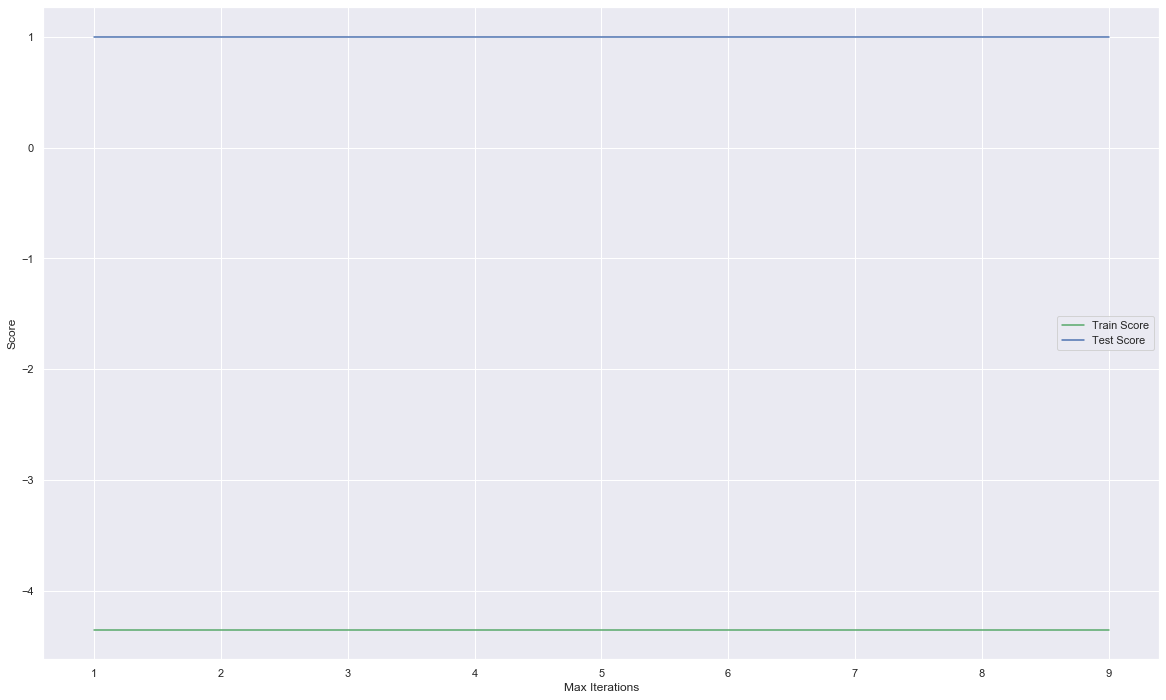

In [162]:
from sklearn.svm import LinearSVR

sns.set(rc={'figure.figsize':(20,12)})
linear_svm = LinearSVR()

linear_svm.fit(X_train, y_train)
y_pred=linear_svm.predict(X_test)

train_score_array = []
test_score_array = []

for n in range(1,10):
    linear_svm = LinearSVR(max_iter=n)
    linear_svm.fit(X_train, y_train)
    train_score_array.append(linear_svm.score(X_train, y_train))
    test_score_array.append(linear_svm.score(X_test, y_pred))

x_axis = range(1,10)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('Max Iterations')
plt.ylabel('Score')

In [163]:
linear_svm = LinearSVR(max_iter=1)
linear_svm.fit(X_train, y_train)

y_pred_svm=linear_svm.predict(X_test)

print('Train score: {:.4f} %'.format(linear_svm.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(linear_svm.score(X_test, y_test)*100))
print('r2_score :', linear_svm.score(X_test,y_test))
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred_svm))))

Train score: -434.8344 %
Test score: -436.6278 %
r2_score : -4.3662775086933525
RMSE: 179693.1102


c:\users\vithi\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### Cross Validation - Linear SVM

In [164]:
from sklearn.model_selection import cross_val_score, cross_val_predict
linear_svm = LinearSVR(max_iter=1)
scores_train = cross_val_score(linear_svm, X_train, y_train)
scores_test = cross_val_predict(linear_svm, X_test, y_test)
print("Cross-validation scores_train: {}".format(scores_train))
print("Cross-validation scores_test: {}".format(scores_test))

Cross-validation scores_train: [-5.27466625 -4.04346221 -5.13621641]
Cross-validation scores_test: [6524.25519103 5774.63827563 6762.2586618  6721.99102721 6048.04498734
 6459.58386758 6029.77689364 6528.95204662 6500.31286503 6770.57341276
 6338.37396086 6617.35738348 5470.01649032 6335.36367781 6424.0834367
 6441.5074354  6624.91732598 6397.15599956 6479.06319186 5896.55906641
 5736.46798368 6311.18082234 6600.9160739  6494.11796343 6704.73392864
 6054.76596235 6560.28715991 6577.84266426 6530.404652   6513.5733166
 6292.96118179 6295.55420891 5925.10701596 6396.53148837 6664.37418621
 6433.39614105 6262.92547882 6625.5982504  6482.31398848 6333.41909083
 6748.25892189 6885.28115335 5476.0161077  6145.72693498 6304.317041
 6457.29581647 5977.7478065  5823.78674822 6593.28259696 6478.52579506
 6300.39207018 6324.64559446 6254.86560555 6166.79847586 6273.38159452
 5837.21491008 6370.2113132  6130.62895561 6336.09065626 5722.1144546
 5834.17960031 6311.94361243 6481.10781298 6453.030508

c:\users\vithi\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\vithi\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\vithi\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\vithi\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\vithi\appd

In [165]:
print("Average cross-validation score_train: {:.2f}".format(scores_train.mean()))
print("Average cross-validation score_test: {:.2f}".format(scores_test.mean()))

Average cross-validation score_train: -4.82
Average cross-validation score_test: 6313.48


# [8] Linear SVR with Kernel

In [146]:
from sklearn.svm import SVR, LinearSVR

In [147]:
clf2 = SVR(kernel='linear', C=1)
clf2.fit(X_train,y_train)
clf2.score(X_train,y_train)

-0.03375123161374072

In [148]:
clf2.score(X_test,y_test)

-0.01874840957978674

In [149]:
clf2 = SVR(kernel='linear', C=10)
clf2.fit(X_train,y_train)
clf2.score(X_train,y_train)

0.03777597197089555

In [151]:
clf2.score(X_test,y_test)

0.050006841448406614

In [152]:
clf2 = SVR(kernel='linear', C=100)
clf2.fit(X_train,y_train)
clf2.score(X_train,y_train)

0.43860361520301466

In [153]:
clf2.score(X_test,y_test)

0.42201138453487785

In [154]:
clf2 = SVR(kernel='linear', C=1000)
clf2.fit(X_train,y_train)
clf2.score(X_train,y_train)

0.8119166284623746

In [155]:
clf2.score(X_test,y_test)

0.6958410746179242

In [156]:
clf2 = SVR(kernel='linear', C=500)
clf2.fit(X_train,y_train)
clf2.score(X_train,y_train)

0.7436530765487193

In [157]:
clf2.score(X_test,y_test)

0.6674622026879353

The best value of C for SVM with kernerl = 'linear' is 500, as both the train and test scores are near and highest.

# Best Regression Model

In [166]:
print('RMSE Linear Regression: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,pred_linear))))
print('RMSE Linear SVM: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred_svm))))
print('RMSE KNN Regressor: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))
print('RMSE Polynomial Regression: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred_poly))))
print('RMSE Decision Tree Regressor: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred_tree))))
print('RMSE Ridge Regression: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred_ridge))))
print('RMSE Lasso Regression: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred_lasso))))

RMSE Linear Regression: 53544.8847
RMSE Linear SVM: 179693.1102
RMSE KNN Regressor: 179693.1102
RMSE Polynomial Regression: 54063.1162
RMSE Decision Tree Regressor: 44907.8897
RMSE Ridge Regression: 43342.3995
RMSE Lasso Regression: 44120.4260


# Best Model
Seeing the lowest RMSE, KNN Regressor can be considered as the best model here for this dataset.